In [110]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.ioff()
import os
os.chdir("/content/drive/MyDrive/Tensorflow Advance/Practice/LinearRegression/")
from PIL import Image
import imageio
import pandas as pd


print("Version of tensorflow is : ",tf.__version__)

Version of tensorflow is :  2.3.0


In [111]:
dataframe = pd.read_csv('./data.csv' , names = ['data' , 'label'])
dataframe = dataframe.sort_values(by="data")
os.chdir('./Pics')

In [112]:
X_train, X_test, y_train, y_test = train_test_split(dataframe['data'], dataframe['label'],
                                                    test_size=0.33, random_state=42)

In [113]:
X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values

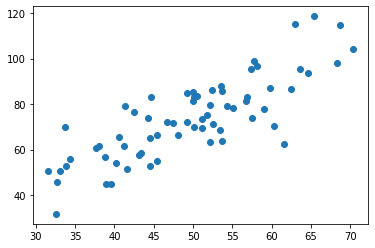

In [114]:
plt.plot(X_train , y_train , 'o')
plt.show()

In [115]:
mean_x = np.mean(X_train)
X_train = X_train - mean_x
std_x  = np.std(X_train)
X_train = X_train / std_x

mean_y = np.mean(y_train)
y_train = y_train - mean_y
std_y  = np.std(y_train)
y_train = y_train / std_y

X_test = X_test - mean_x
X_test = X_test / std_x
y_test = y_test - mean_y
y_test = y_test / std_y

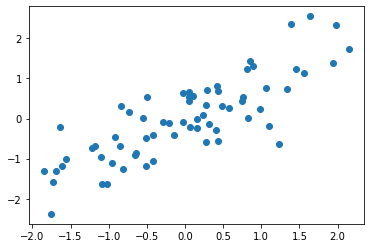

In [116]:
plt.plot(X_train , y_train , 'o')
plt.show()

In [13]:
class MyModel():
    def __init__(self):
        self.w = tf.Variable(3.0 , trainable=True , name="weight")
        self.b = tf.Variable(1.0 , trainable=True , name="kernal")

    def __call__(self , input):
        return self.w * input + self.b

In [14]:
def get_loss(y_true , y_pred):
    return tf.reduce_mean(tf.square( y_true - y_pred ))

In [39]:
def doOptimization(model , x , y_true , learning_rate):
    with tf.GradientTape() as tape:
        pred = model(x)
        loss = get_loss(y_true=y_true , y_pred=pred)
    dw , db = tape.gradient(loss , [model.w , model.b])
    #print(dw)
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

    return loss

In [40]:
def train_model(model , x , y , test_x , test_y , epochs = 1000 , learning_rate = 0.001 ,
                print_freq = None , save_frq = None):
    history = {}
    history['loss'] = []
    history['val_loss'] = []
    history['w'] = []
    history['b'] = []
    image = []
    for epoch in range(epochs):
        loss     = doOptimization(model , x , y , learning_rate)
        val_loss = get_loss(y_test , model(test_x))

        history['loss'].append(loss.numpy())
        history['val_loss'].append(val_loss.numpy())
        history['w'].append(model.w.numpy())
        history['b'].append(model.b.numpy())

        if save_frq != None and ((epoch+1) % save_frq == 0 or epoch == 0) :
            plt.clf()
            f , ax = plt.subplots(1,2,figsize=(16 , 5))
            ax[0].plot(history['loss'] , label = "Train_loss")
            ax[0].plot(history['val_loss'] , label = "Test_loss")
            ax[0].legend()

            ax[1].plot(X_train , y_train , 'o' , label="True Val")
            ax[1].plot(X_train , model(X_train).numpy() , 'r' , label="prediction")
            ax[1].legend()
            ax[0].set_title("EPOCH : %d"%epoch)
            ax[1].set_title("EPOCH : %d"%epoch)
            name = "pic%d.png"%epoch
            plt.savefig(name)
            image_ = Image.open(name)
            image.append(np.array(image_))

        if print_freq != None and ((epoch+1) % print_freq == 0 or epoch == 0):
            print("Epoch  %6d   ====  Loss : %2.3f    Val_Loss : %2.3f    ===    w : %2.3f    b : %2.3f"%
                  (epoch+1 , loss , val_loss , model.w,model.b))
            
            plt.show()
            
            

    #imageio.mimsave('./animation.gif' , image , fps = 1)
    return history

Epoch       1   ====  Loss : 6.540    Val_Loss : 3.890    ===    w : 2.998    b : 0.999


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

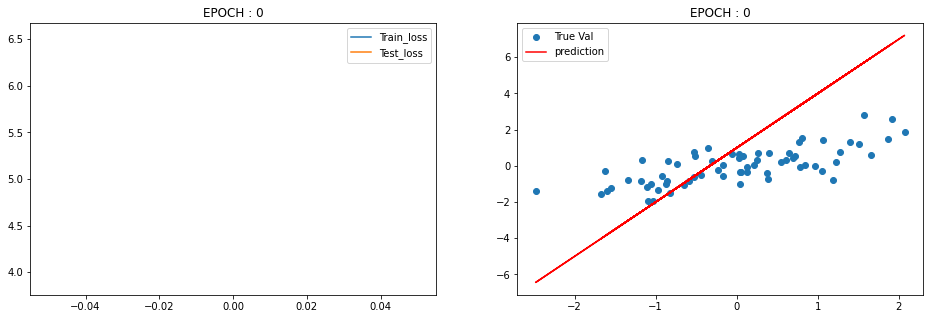

Epoch    1000   ====  Loss : 1.273    Val_Loss : 0.744    ===    w : 1.573    b : 0.368


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

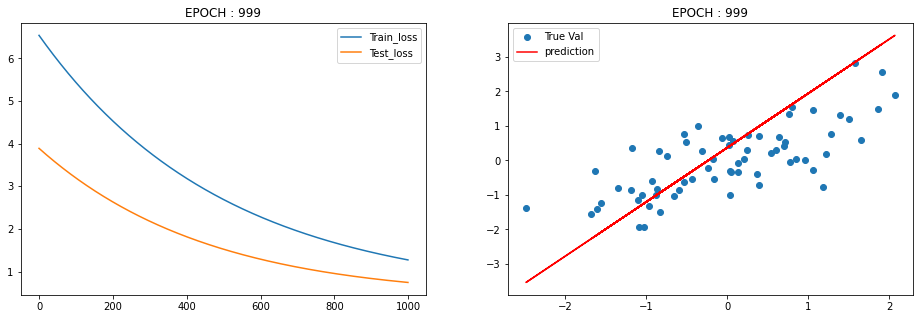

Epoch    2000   ====  Loss : 0.559    Val_Loss : 0.460    ===    w : 1.048    b : 0.135


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

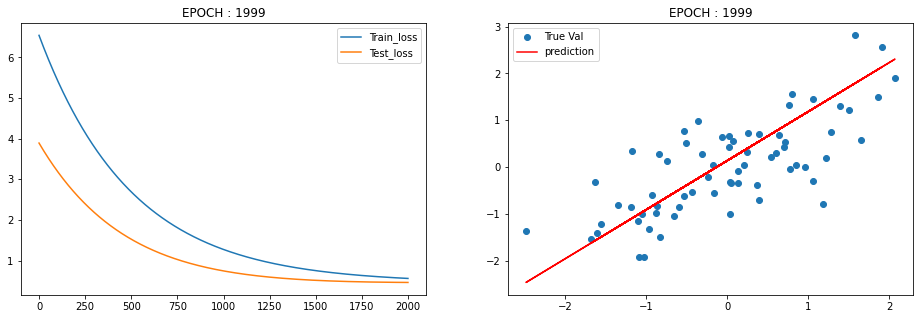

Epoch    3000   ====  Loss : 0.463    Val_Loss : 0.474    ===    w : 0.855    b : 0.050


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

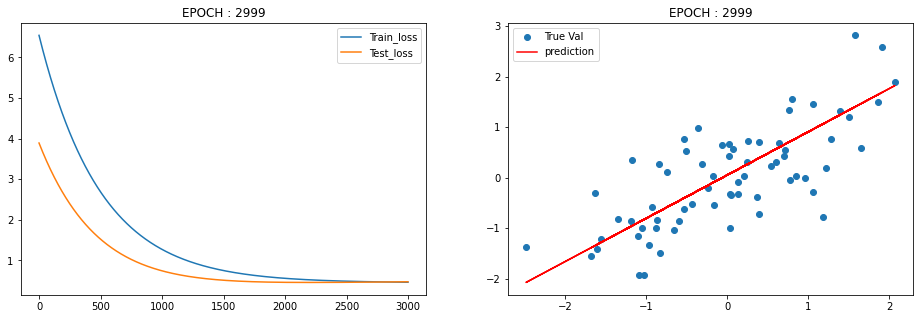

Epoch    4000   ====  Loss : 0.450    Val_Loss : 0.495    ===    w : 0.785    b : 0.018


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

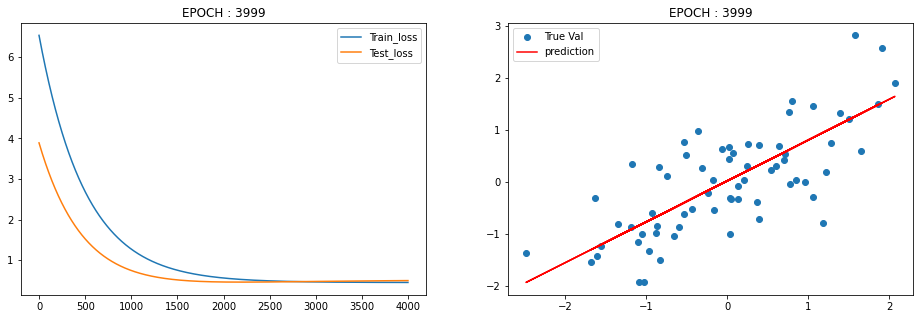

Epoch    5000   ====  Loss : 0.448    Val_Loss : 0.505    ===    w : 0.758    b : 0.007


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

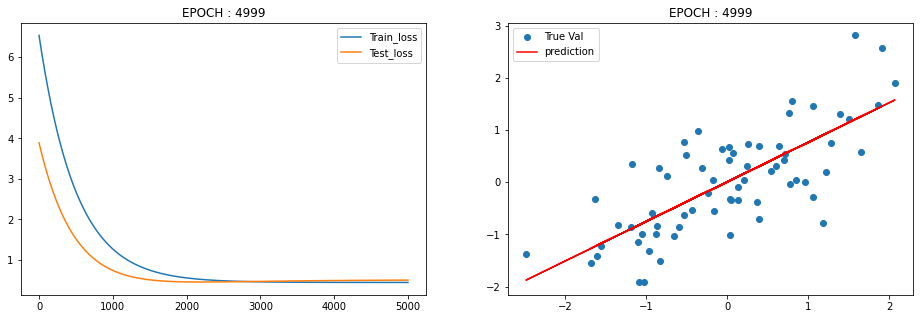

Epoch    6000   ====  Loss : 0.448    Val_Loss : 0.509    ===    w : 0.749    b : 0.002


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

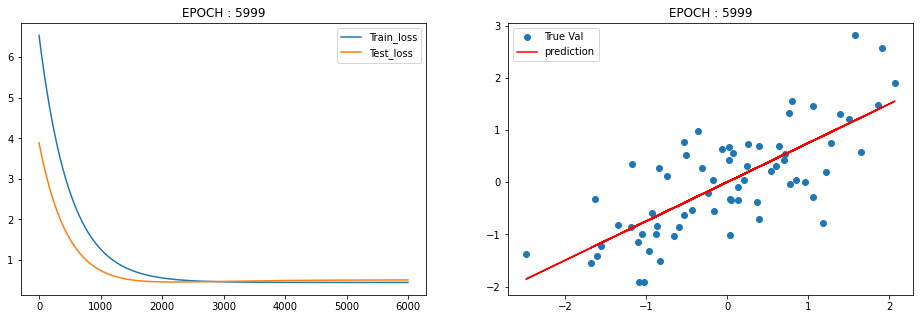

In [41]:
model = MyModel()
history = train_model(model , X_train , y_train , X_test , y_test , learning_rate=0.0005 ,print_freq=1000 , 
                      epochs=6000 , save_frq = 100)

**Create Polynomial Model**

In [118]:
os.chdir("/content/drive/MyDrive/Tensorflow Advance/Practice/LinearRegression/")

In [119]:
def create_pol_data(x , deg = 1):
    data = pd.DataFrame()
    data["pol%d"%1] = x
    for i in range(2,deg+1):
        data["pol%d"%i] = data['pol1'] ** i
    return data.values

In [120]:
class My_Pol_Model():
    def __init__(self , deg):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(w_init((deg,1) ,dtype="float32") , trainable=True , name="weight")
        self.b = tf.Variable(0.0 , trainable=True , name="kernal" , dtype='float32')

    def __call__(self , input):
        return tf.matmul(input , self.w) + self.b

In [121]:
#No change
def get_pol_loss(y_true , y_pred):
    return tf.reduce_mean(tf.square( y_true - y_pred ))

In [122]:
def do_Pol_Optimization(model , x , y_true , learning_rate):
    with tf.GradientTape() as tape:
        pred = model(x)
        loss = get_pol_loss(y_true=y_true , y_pred=pred)
    dw , db = tape.gradient(loss , [model.w , model.b])
    #print(dw)
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

    return loss

In [125]:
def train_pol_model(model , x , y , test_x , test_y , epochs = 1000 , learning_rate = 0.001 ,
                print_freq = None , save_frq = None , x_deg_1 = None , y_deg_1 = None , deg = 1):
    
    try:
        os.mkdir("./Pics_deg%d"%deg)
    except:
        pass

    history = {}
    history['loss'] = []
    history['val_loss'] = []
    history['w'] = []
    history['b'] = []
    image = []
    for epoch in range(epochs):
        loss     = do_Pol_Optimization(model , x , y , learning_rate)
        val_loss = get_pol_loss(test_y , model(test_x))

        history['loss'].append(loss.numpy())
        history['val_loss'].append(val_loss.numpy())
        history['w'].append(model.w.numpy())
        history['b'].append(model.b.numpy())

        if save_frq != None and ((epoch+1) % save_frq == 0 or epoch == 0) :
            plt.clf()
            f , ax = plt.subplots(1,2,figsize=(16 , 5))
            ax[0].plot(history['loss'] , label = "Train_loss")
            ax[0].plot(history['val_loss'] , label = "Test_loss")
            ax[0].legend()

            ax[1].plot(x_deg_1 , y_deg_1 , 'o' , label="True Val")
            ax[1].plot(x_deg_1 , model(x).numpy()[:,0] , 'ro' , label="prediction")
            ax[1].legend()
            ax[0].set_title("EPOCH : %d"%epoch)
            ax[1].set_title("EPOCH : %d"%epoch)
            name = "./Pics_deg%d/pic%d.png"%(deg , epoch)
            plt.savefig(name)
            image_ = Image.open(name)
            image.append(np.array(image_))

        if print_freq != None and ((epoch+1) % print_freq == 0 or epoch == 0):
            print("Epoch  %6d   ====  Loss : %2.3f    Val_Loss : %2.3f"%
                  (epoch+1 , loss , val_loss))
            
            plt.show()
            
            

    imageio.mimsave('./animation_deg_%d.gif'%deg , image , fps = 1)
    return history

**Polynomial model of degree 1**

Epoch       1   ====  Loss : 0.952    Val_Loss : 0.625


<Figure size 432x288 with 0 Axes>

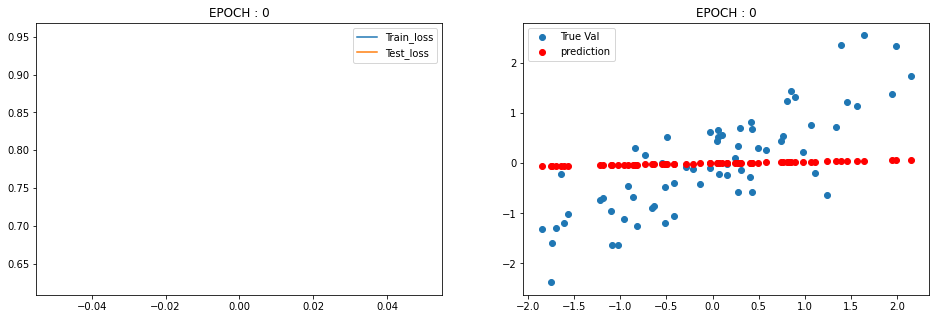

Epoch    1000   ====  Loss : 0.415    Val_Loss : 0.356


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

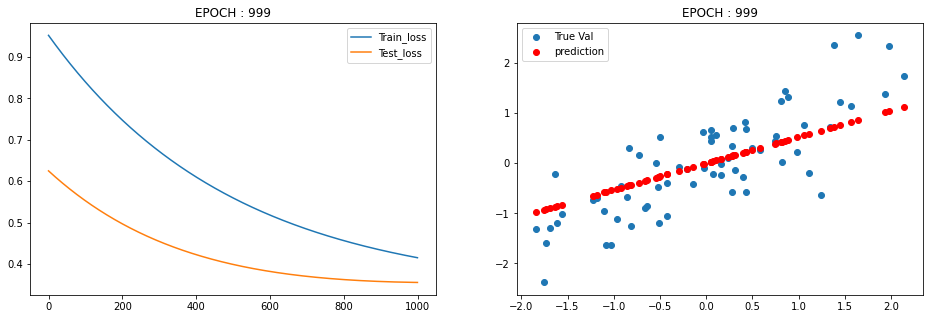

Epoch    2000   ====  Loss : 0.343    Val_Loss : 0.381


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

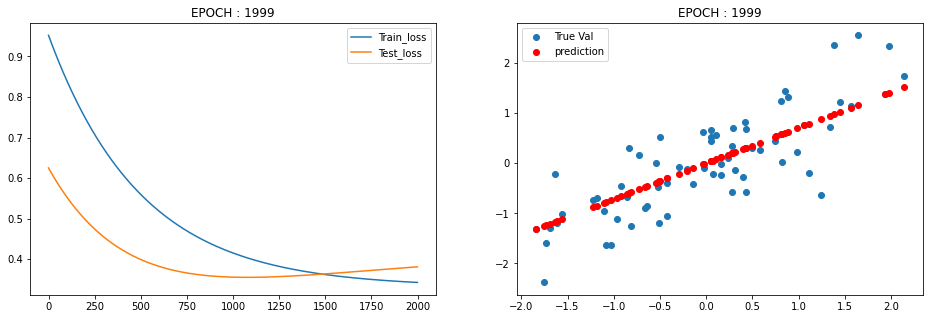

Epoch    3000   ====  Loss : 0.333    Val_Loss : 0.408


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

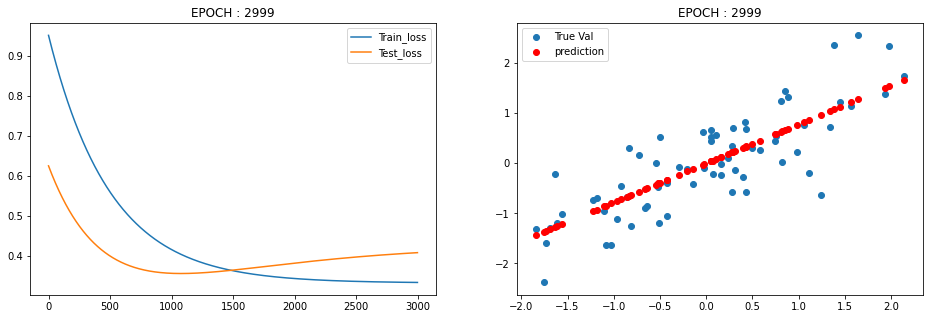

Epoch    4000   ====  Loss : 0.332    Val_Loss : 0.419


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

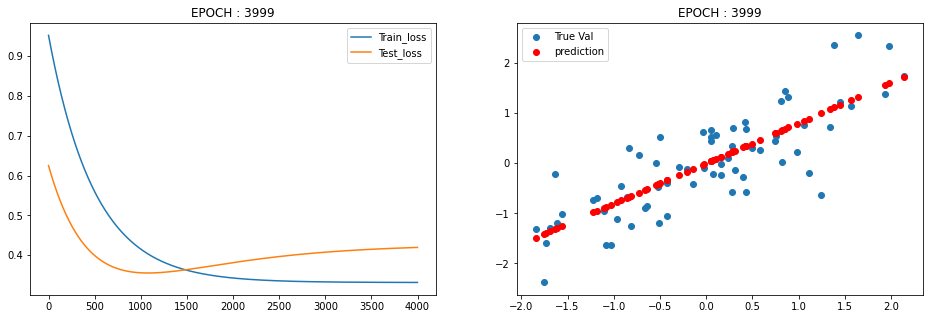

Epoch    5000   ====  Loss : 0.331    Val_Loss : 0.424


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

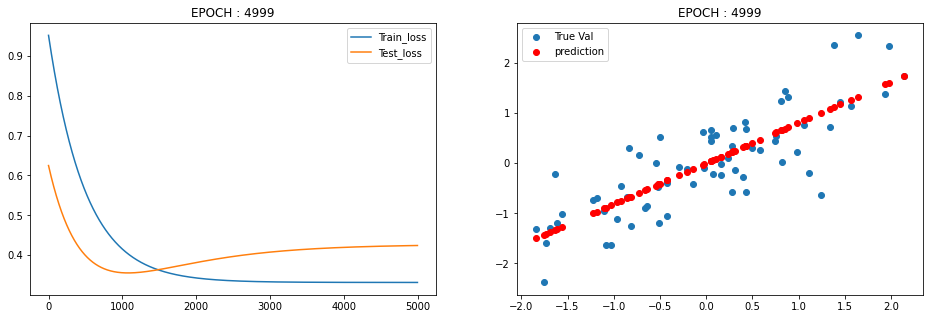

Epoch    6000   ====  Loss : 0.331    Val_Loss : 0.426


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

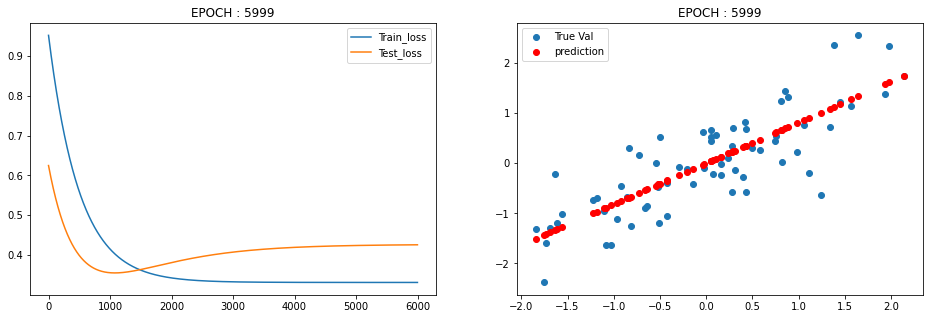

In [127]:
X_train_ = create_pol_data(X_train).astype('float32')
y_train_ = y_train.reshape((y_train.shape[0] , 1)).astype('float32')
X_test_  = create_pol_data(X_test).astype('float32')
y_test_  = y_test.reshape((y_test.shape[0] , 1)).astype('float32')

model_pol = My_Pol_Model(deg = 1)
history = train_pol_model(model_pol , X_train_ , y_train_ , X_test_ , y_test_ , learning_rate=0.0005 ,print_freq=1000 , 
                      epochs=6000 , save_frq = 100 , x_deg_1 = X_train , y_deg_1 = y_train , deg = 1)

**Create model of deg2**

Epoch       1   ====  Loss : 0.990    Val_Loss : 0.713


<Figure size 432x288 with 0 Axes>

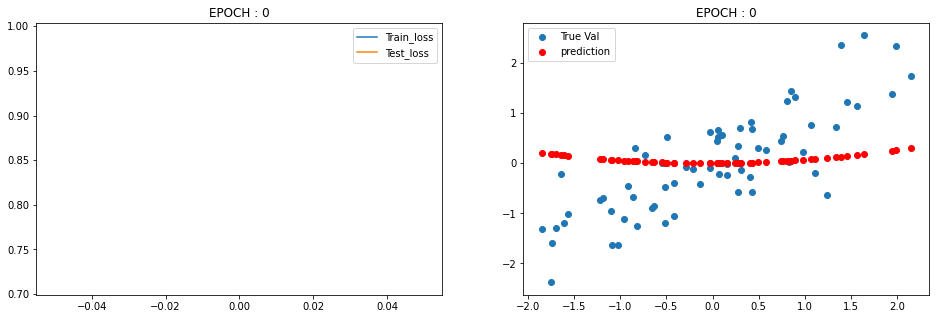

Epoch    1000   ====  Loss : 0.341    Val_Loss : 0.371


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

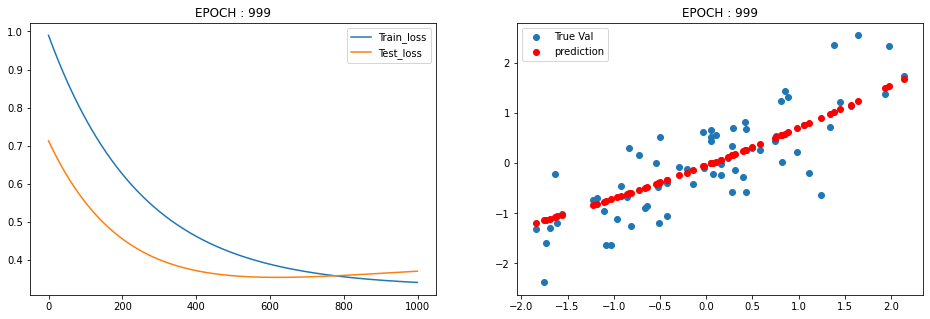

Epoch    2000   ====  Loss : 0.329    Val_Loss : 0.405


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

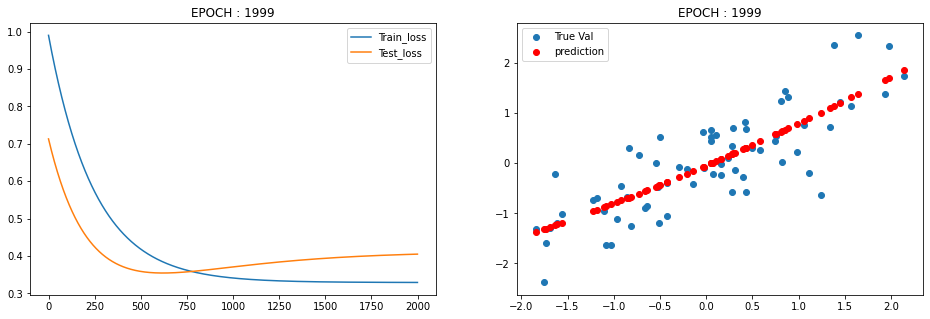

Epoch    3000   ====  Loss : 0.329    Val_Loss : 0.411


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

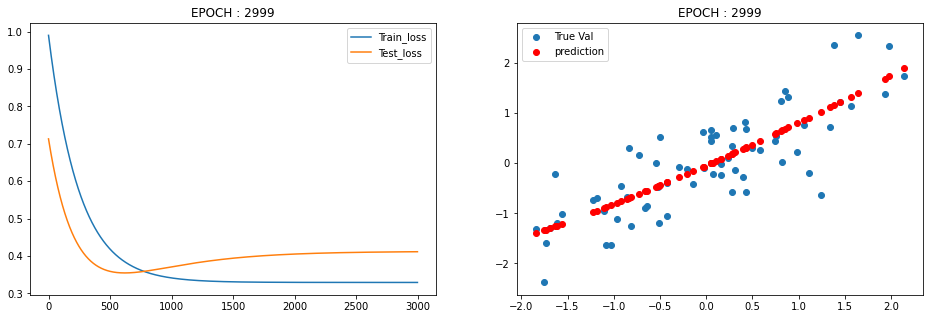

Epoch    4000   ====  Loss : 0.329    Val_Loss : 0.412


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

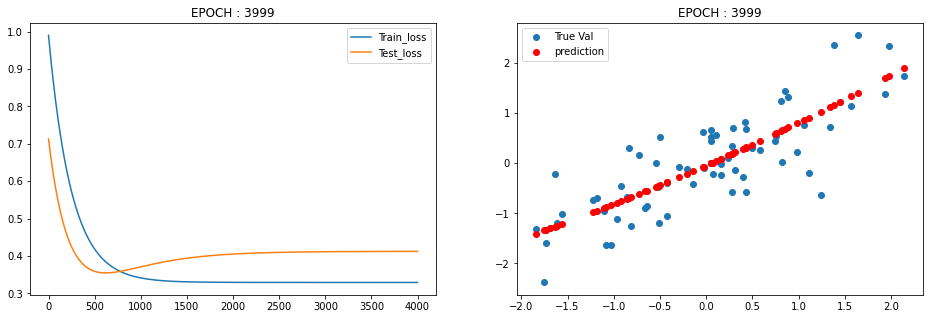

Epoch    5000   ====  Loss : 0.329    Val_Loss : 0.412


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

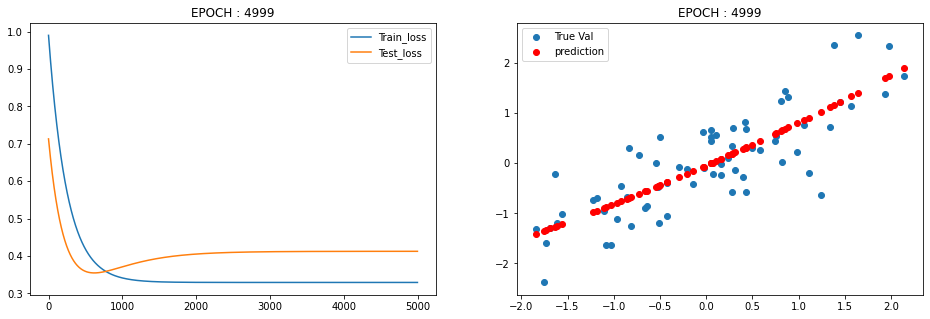

Epoch    6000   ====  Loss : 0.329    Val_Loss : 0.412


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

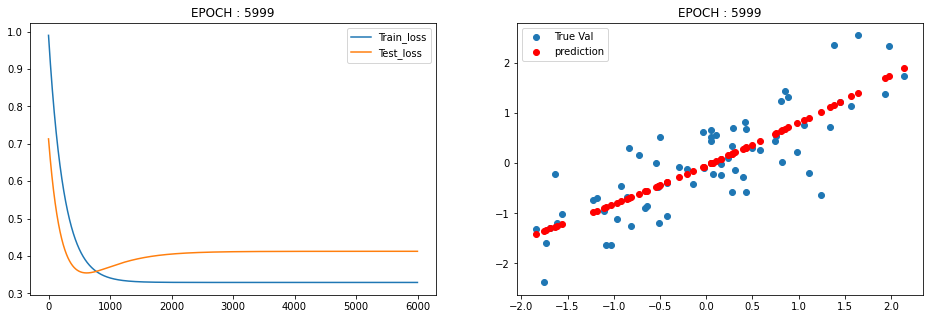

In [128]:
X_train_ = create_pol_data(X_train , deg=2).astype('float32')
y_train_ = y_train.reshape((y_train.shape[0] , 1)).astype('float32')
X_test_  = create_pol_data(X_test , deg = 2).astype('float32')
y_test_  = y_test.reshape((y_test.shape[0] , 1)).astype('float32')

model_pol_2 = My_Pol_Model(deg = 2)
history_deg_2 = train_pol_model(model_pol_2 , X_train_ , y_train_ , X_test_ , y_test_ , learning_rate=0.001 ,print_freq=1000 , 
                      epochs=6000 , save_frq = 100 , x_deg_1 = X_train , y_deg_1 = y_train , deg = 2)

Epoch       1   ====  Loss : 0.997    Val_Loss : 0.603


<Figure size 432x288 with 0 Axes>

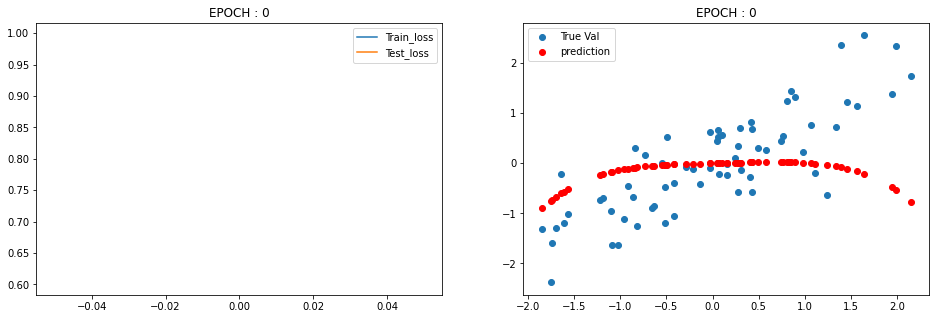

Epoch    1000   ====  Loss : 0.362    Val_Loss : 0.642


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

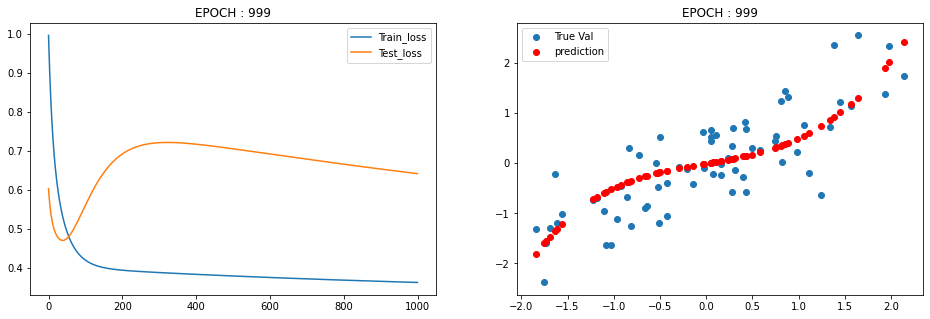

Epoch    2000   ====  Loss : 0.343    Val_Loss : 0.551


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

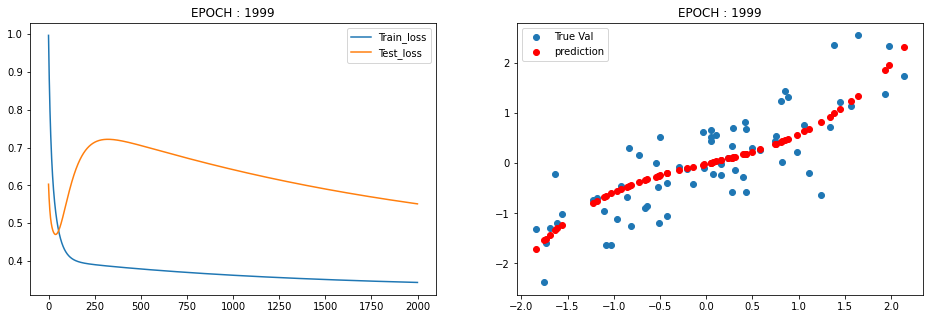

Epoch    3000   ====  Loss : 0.334    Val_Loss : 0.499


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

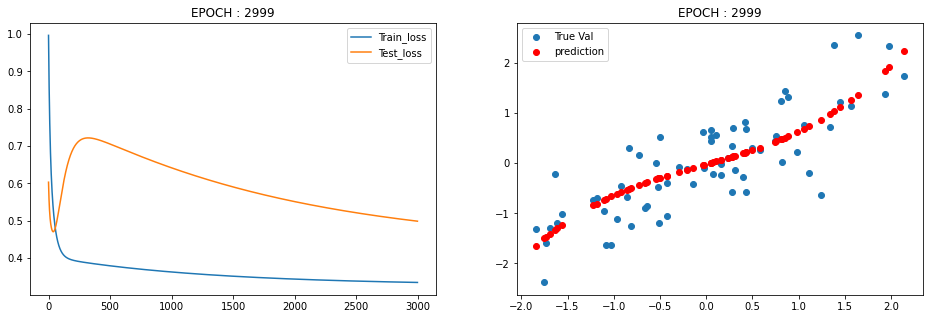

Epoch    4000   ====  Loss : 0.330    Val_Loss : 0.468


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

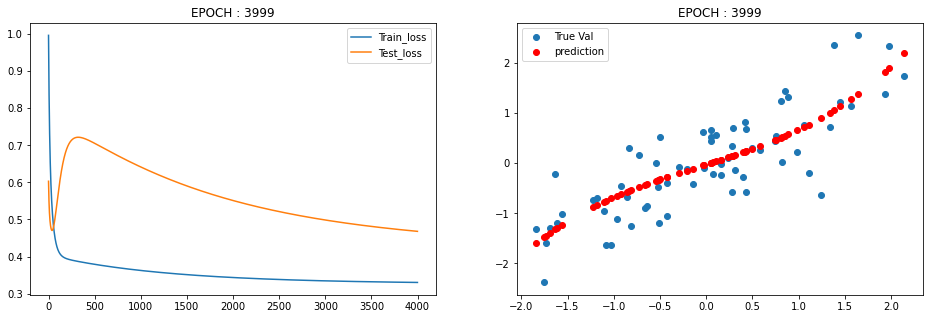

Epoch    5000   ====  Loss : 0.328    Val_Loss : 0.450


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

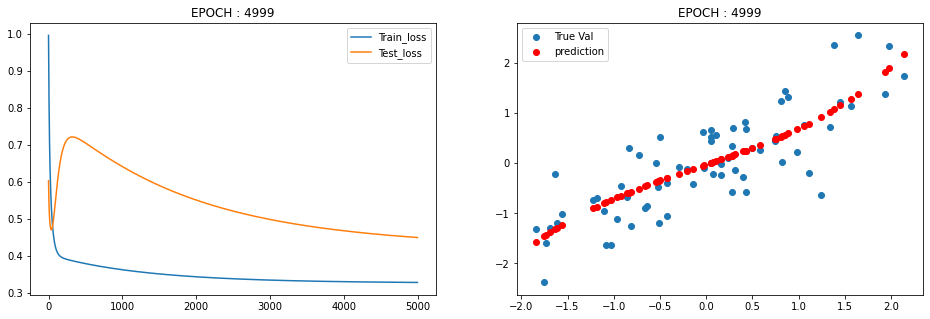

Epoch    6000   ====  Loss : 0.327    Val_Loss : 0.438


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

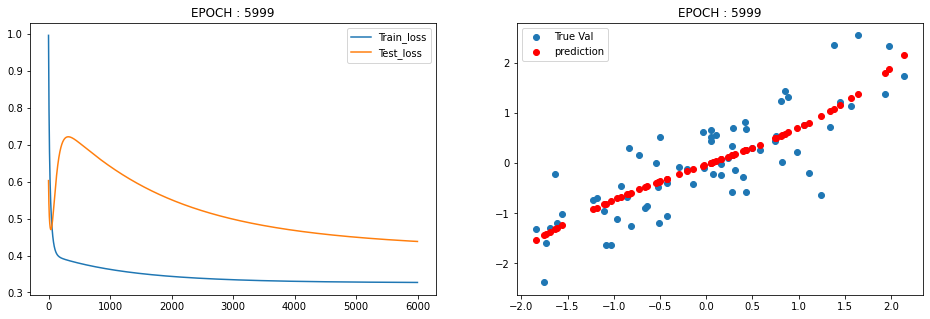

In [129]:
X_train_ = create_pol_data(X_train , deg=4).astype('float32')
y_train_ = y_train.reshape((y_train.shape[0] , 1)).astype('float32')
X_test_  = create_pol_data(X_test , deg = 4).astype('float32')
y_test_  = y_test.reshape((y_test.shape[0] , 1)).astype('float32')

model_pol_4 = My_Pol_Model(deg = 4)
history_deg_4 = train_pol_model(model_pol_4 , X_train_ , y_train_ , X_test_ , y_test_ , learning_rate=0.001 ,print_freq=1000 , 
                      epochs=6000 , save_frq = 100 , x_deg_1 = X_train , y_deg_1 = y_train , deg = 4)

Epoch       1   ====  Loss : 1.617    Val_Loss : 2.144


<Figure size 432x288 with 0 Axes>

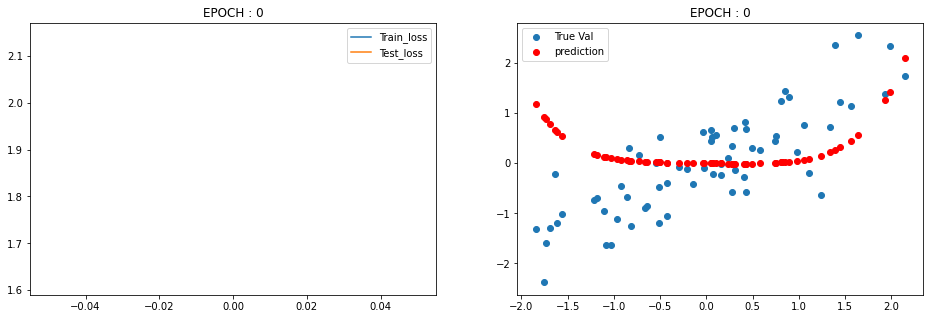

Epoch    1000   ====  Loss : 0.347    Val_Loss : 1.025


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

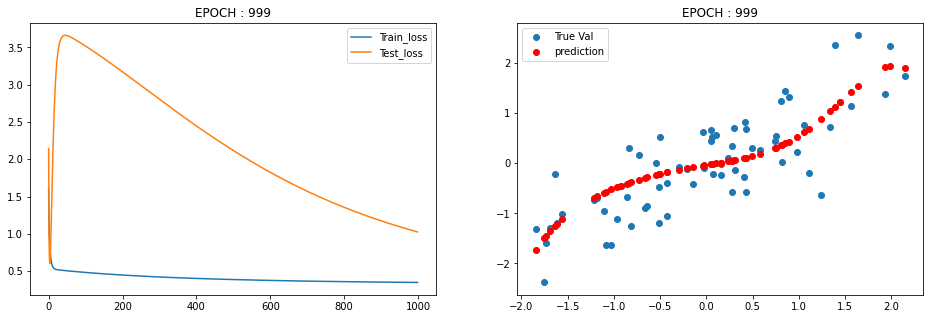

Epoch    2000   ====  Loss : 0.329    Val_Loss : 0.458


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

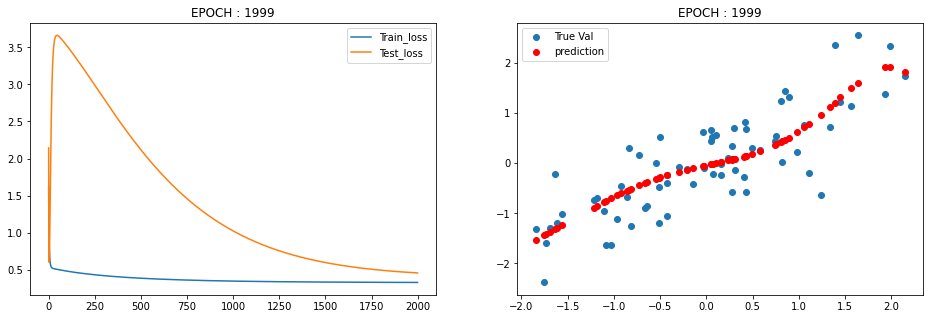

Epoch    3000   ====  Loss : 0.326    Val_Loss : 0.411


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

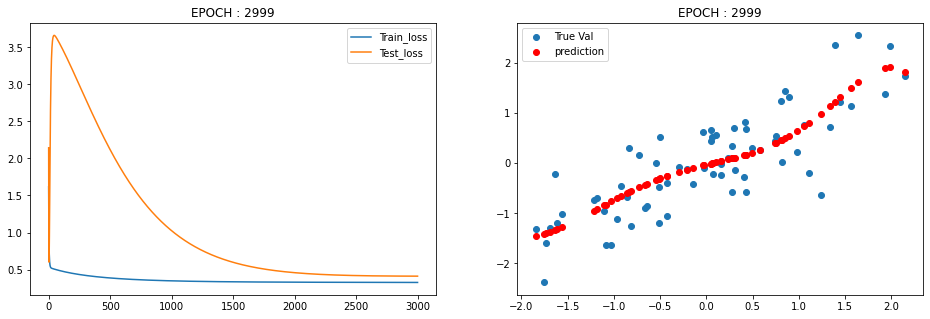

Epoch    4000   ====  Loss : 0.324    Val_Loss : 0.411


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

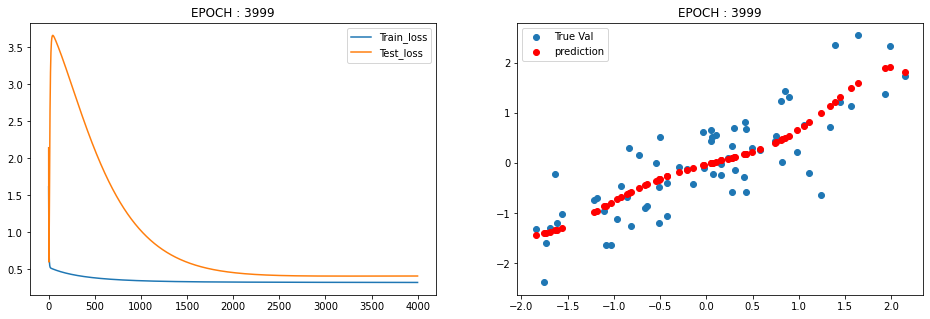

Epoch    5000   ====  Loss : 0.323    Val_Loss : 0.412


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

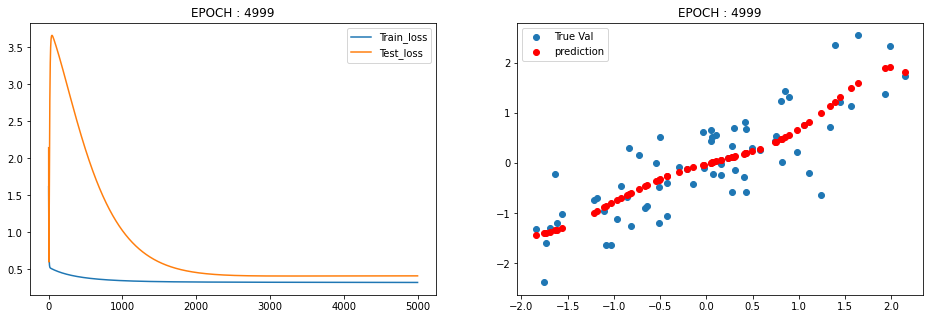

Epoch    6000   ====  Loss : 0.322    Val_Loss : 0.416


<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

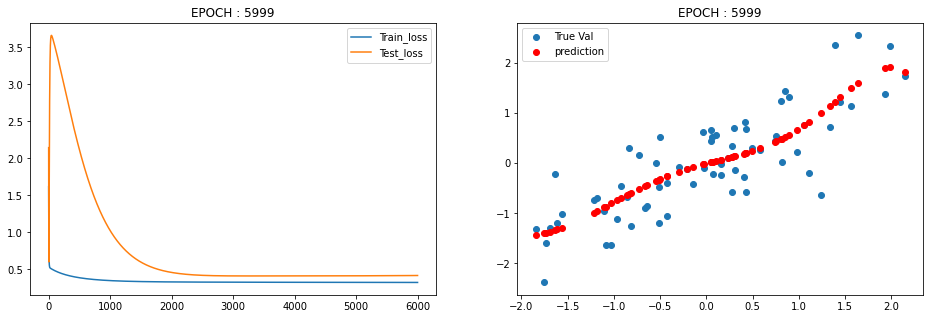

In [132]:
X_train_ = create_pol_data(X_train , deg=6).astype('float32')
y_train_ = y_train.reshape((y_train.shape[0] , 1)).astype('float32')
X_test_  = create_pol_data(X_test , deg = 6).astype('float32')
y_test_  = y_test.reshape((y_test.shape[0] , 1)).astype('float32')

model_pol_6 = My_Pol_Model(deg = 6)
history_deg_6 = train_pol_model(model_pol_6 , X_train_ , y_train_ , X_test_ , y_test_ , learning_rate=0.001 ,print_freq=1000 , 
                      epochs=6000 , save_frq = 100 , x_deg_1 = X_train , y_deg_1 = y_train , deg = 6)